# **Análise Exploratória de Doenças Cardiovasculares**

**Grupo 04** (Alexandre Oliveira, Philippe Sotero, Letícia Silva e Natália Mafra)

## **1. Introdução**
As doenças cardiovasculares são a principal causa de morte no mundo: mais pessoas morrem anualmente por essas enfermidades do que por qualquer outra causa. Estima-se que 17,9 milhões de pessoas morreram por doenças cardiovasculares em 2016, representando 31% de todas as mortes em nível global. Destes óbitos, estima-se que 85% ocorrem devido a ataques cardíacos e acidentes vasculares cerebrais (AVCs). Mais de três quartos das mortes por doenças cardiovasculares ocorrem em países de baixa e média renda. Das 17 milhões de mortes prematuras (pessoas com menos de 70 anos) por doenças crônicas não transmissíveis, 82% acontecem em países de baixa e média renda e 37% são causadas por doenças cardiovasculares. Fonte: https://www.paho.org/pt/topicos/doencas-cardiovasculares



<img src = "/work/img/cardiac-arrest-gdaebf3b52_1920.jpg">

## **2. Obtenção dos Dados**

Este projeto desenvolve uma análise exploratória dos dados fornecidos pelo *UCI Heart Disease dataset*, disponível no link abaixo:
https://www.kaggle.com/andrewmvd/heart-failure-clinical-data?select=heart_failure_clinical_records_dataset.csv

### **2.1 Importação das Bibliotecas**

In [ ]:
# Bibliotecas a serem utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
import plotly.express as px
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Padronização da exibição dos dados com o Pandas
pd.options.display.float_format = '{:.2f}'.format

### **2.2 Importação do Dataset**

In [ ]:
# Base de dados disponível na pasta "data"
df = pd.read_csv('data/heart_failure_clinical_records_dataset.csv')

## **3. Visão geral do conjunto de dados**

In [ ]:
# Visão inicial do DataFrame a partir das 5 primeiras linhas

df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.00,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
1,55.00,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
2,65.00,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
3,50.00,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
4,65.00,1,160,1,20,0,327000.00,2.70,116,0,0,8,1


### **3.1 Dimensões do DataFrame**


In [ ]:
print('Entradas: ', df.shape[0])
print('Variáveis: ', df.shape[1])

Entradas:  299
Variáveis:  13


### **3.2 Análise rápida do tipo de dados**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


A partir dos dados obtidos acima com o método _.info_, observamos que:

    1. Os nomes das colunas estão todos em inglês
    2. Todas as células das 299 linhas estão preenchidas
    3. Todas as colunas são do tipo inteiro ou float

#### **3.2.1. Alterando os nomes das colunas**

In [ ]:
# Para facilitar a manipulação, mudaremos os nomes das colunas para o português
# Colocaremos também as iniciais em maiúsculas
df.columns =['Idade', 'Anemia', 'Creatinafosfoquinase', 'Diabetes', 
            'Fracao_ejecao', 'Pressao_alta', 'Plaquetas', 'Creatinina_soro', 
            'Sodio_soro', 'Sexo', 'Fumante', 'Tempo', 'Morte']
           

In [ ]:
# Testando a alteração dos nomes das colunas:
df.columns

Index(['Idade', 'Anemia', 'Creatinafosfoquinase', 'Diabetes', 'Fracao_ejecao',
       'Pressao_alta', 'Plaquetas', 'Creatinina_soro', 'Sodio_soro', 'Sexo',
       'Fumante', 'Tempo', 'Morte'],
      dtype='object')

#### **3.2.2. Confirmando a ausência de valores nulos**

Considerando que a base de dados contempla dados de 299 pacientes e que todas as colunas tem 299 células preenchidas, percebemos que **não há nenhum valor faltante, ou seja, nulo**.

Essa conclusão pode ser confirmada pela aplicação do método .isnull() na base original, seguido do método .sum():

In [ ]:
df.isnull().sum()

Idade                   0
Anemia                  0
Creatinafosfoquinase    0
Diabetes                0
Fracao_ejecao           0
Pressao_alta            0
Plaquetas               0
Creatinina_soro         0
Sodio_soro              0
Sexo                    0
Fumante                 0
Tempo                   0
Morte                   0
dtype: int64

**Confirmada, portanto, a conclusão de que a base de dados não possui valores faltantes ou nulos.**

#### **3.2.3. Tipos de variáveis**

Como vimos, são 13 as variáveis encontradas neste DataSet:

*  **Idade (anos)**: idade do paciente.
*  **Anemia (Sim/Não)**: paciente com anemia = 1, paciente sem anemia = 0.
*  **Creatinafosfoquinase (mcg/L)**: proteína encontrada no sangue/músculo cardíaco sendo utilizada como marcador do infarto. VR: 32 a 294 U/L.
*  **Diabetes (Sim/Não)**: pacientes com diabetes = 1, sem diabetes = 0.
*  **Fracao_ejecao (%)**: capacidade de expulsar sangue do coração. VR: (%) 55/70(normal) 40/54 levemente abaixo, 35/39 moderadamente abaixo, menos de 35, severamente abaixo do normal.
*  **Pressao_alta (Sim/Não)**: danifica as artérias e levam a doenças cardiovasculares. Pacientes com pressão alta = 1, sem pressão alta = 0.
*  **Plaquetas (kiloplatelets/mL)**: responsáveis pela coagulação sanguínea: 150k a 450k - normal, >450k: thrombocytosis (dores de cabeça, fraqueza, tonturas,etc <150k: thrombocytopenia (hemorragia)
*  **Creatinina_soro (mg/dL)**: substância presente no sangue e eliminada pelos rins, quando não bem eliminada pode provocar problemas cardiovasculares. VR: 0,5 a 1,2 mg/dL, alta:cansaço excessivo, falta de ar. baixo: indica doenças hepáticas. Veja que no nosso dataset os valores estão muito alto, o que pode afetar os rins e de tabela o coração.
*  **Sódio (mEq/L)**: nível de sódio no sangue (135 a 145) mEq/L - <135 (mais velhos, letargia, personalidade alterada, confusão), > 145: desordem muscular, coma e morte.
*  **Sexo (Homem/Mulher)**: homem = 1 e mulher = 0
*  **Fumante (Sim/Não)**: sim = 1 e não = 0.
*  **Tempo (dias)**: tempo de acompanhamento médico.
*  **Morte(Sim/Não)**: morto = 1 e vivo = 0.

Embora todas as 13 variáveis sejam do tipo _int_ e _float_, nota-se que há dados categóricos na base, a exemplo de "Sexo" e da coluna "Fumante", que suportam entradas binárias.

Para garantir que não sejam feitas análises numéricas em colunas que contém dados booleanos, transformaremos as variáveis conceitualmente categóricas de _int_ para _bool_:

In [ ]:
# Separando as variaveis: 
vars_categoricas = ['Anemia', 'Diabetes', 'Pressao_alta', 'Sexo', 'Fumante', 'Morte']
vars_continuas = ['Idade', 'Creatinafosfoquinase', 'Fracao_ejecao', 'Plaquetas', 'Creatinina_soro', 'Sodio_soro',
       'Tempo']

# Trocando o tipo das variáveis int para bool:
for variavel in vars_categoricas:
    df[variavel] = df[variavel].astype(bool)

# Dados estatísticos:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Idade,299.00,NaN,NaN,NaN,60.83,11.89,40.00,51.00,60.00,70.00,95.00
Anemia,299,2,False,170,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Creatinafosfoquinase,299.00,NaN,NaN,NaN,581.84,970.29,23.00,116.50,250.00,582.00,7861.00
Diabetes,299,2,False,174,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fracao_ejecao,299.00,NaN,NaN,NaN,38.08,11.83,14.00,30.00,38.00,45.00,80.00
Pressao_alta,299,2,False,194,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Plaquetas,299.00,NaN,NaN,NaN,263358.03,97804.24,25100.00,212500.00,262000.00,303500.00,850000.00
Creatinina_soro,299.00,NaN,NaN,NaN,1.39,1.03,0.50,0.90,1.10,1.40,9.40
Sodio_soro,299.00,NaN,NaN,NaN,136.63,4.41,113.00,134.00,137.00,140.00,148.00
Sexo,299,2,True,194,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 3.2.4. Variável target

A variável target é usada de forma auxiliar para destacar o que o modelo busca prever. Neste caso, é o resultado "Morte", descrito na última coluna do _dataset_.

In [ ]:
target = 'Morte'

In [ ]:
fig = px.histogram(df, x=target, text_auto=True, histnorm = "percent")
fig.update_layout(title="counting cases", xaxis_title=target,\
                  yaxis_title="no. of cases",legend_title="target", font=dict(size=12), yaxis={"ticksuffix":"%","tickformat":".2f" })

fig.show()

Essa visualização também é possível via _countplot_ com o _Matplotlib_, onde conseguimos plotar os rótulos de porcentagens juntamente com a contagem quantitativa das incidências, que são representadas pelas barras:

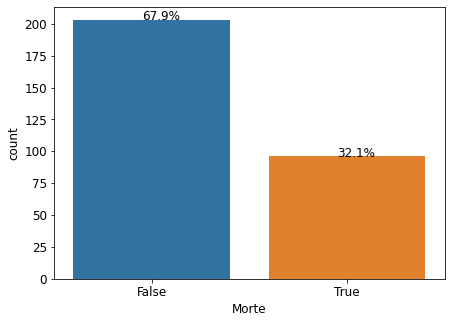

In [ ]:
def porcentagem(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

plt.figure(figsize = (7,5))
ax = sns.countplot(data=df, x=target)
plt.xticks(size = 12)
plt.xlabel(target, size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)

porcentagem(ax, df['Morte'])


Os gráficos acima demostram que esta análise exploratória apresenta certa **tendência ao resultado Falso para o evento "Morte"**, visto que representa 68% do dataset e está, portanto, desbalanceado.

#### 3.2.5. Análise Univariada - Demais variáveis categóricas

Assim como em relação a variável _target_, as conclusões do dataset com base em cada uma das variáveis só será confiável se o grupo estudado envolver uma quantidade equilibrada dos diferentes resultados.

O balanceamento das variáveis categóricas será melhor percebido por meio do _plot_ de sua contagem:

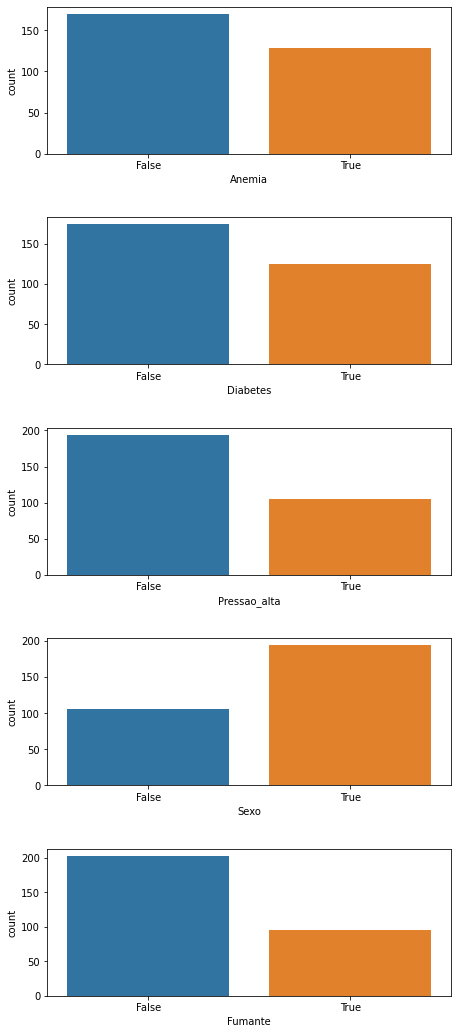

In [ ]:
fig, ax = plt.subplots(5, figsize=(7, 15))

cont = 0
for i in range(5):
    sns.countplot(data=df, x=vars_categoricas[cont], ax=ax[i])
    cont = cont + 1
        
fig.tight_layout(pad=3.0)


Nota-se que as conclusões mais confiáveis serão baseadas nas variáveis "Anemia", "Diabetes". Pressão alta, Fumante e Sexo são critérios que representarão uma tendência para os resultados.

### **4. Limpeza de dados**

Embora já tenhamos inicialmente identificado que não há valores nulos ou faltantes, é preciso descobrir se existem valores destoantes (outliers) para que sejam tratados ou eliminados.

### **4.1 Outliers**

Utilizando _boxplot_ para analisar as propriedades de um conjunto de valores numéricos como mínimo, primeiro quartil, mediana, terceiro quartil e máximo das colunas do DataFrame, localizamos os seguintes dados e Outliers:

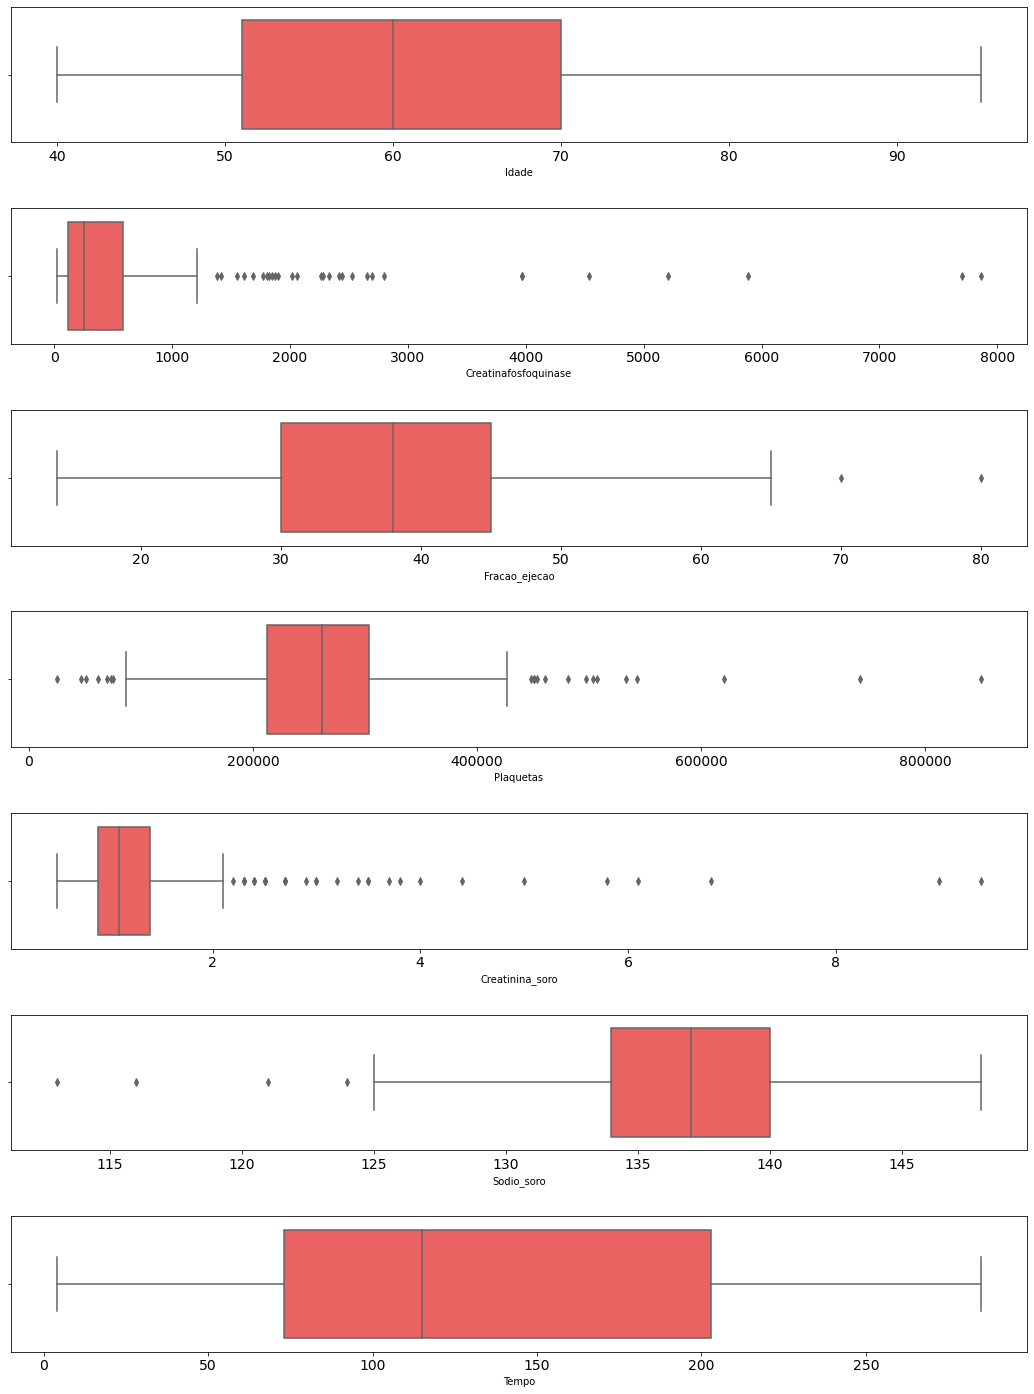

In [ ]:
fig, ax = plt.subplots(7, 1 , figsize=(15, 20))

cont=0
for j in range(7):
    sns.boxplot(data=df[vars_continuas], x=vars_continuas[cont], ax=ax[j], color = '#ff4d4d');
    ax[j].xaxis.set_tick_params(labelsize=14)
    cont = cont + 1

    
fig.tight_layout(pad=3.0)

In [ ]:
trace0 = go.Box(y=df["Creatinafosfoquinase"],name="Creatinafosfoquinase")


data = [trace0]
iplot(data)

In [ ]:
trace1 = go.Box(y=df["Fracao_ejecao"],name="Fracao_ejecao")


data = [trace1]
iplot(data)

In [ ]:
trace2 = go.Box(y=df["Plaquetas"],name="Plaquetas")


data = [trace2]
iplot(data)

In [ ]:
trace3 = go.Box(y=df["Creatinina_soro"],name="Creatinina_soro")


data = [trace3]
iplot(data)

In [ ]:
trace4 = go.Box(y=df["Sodio_soro"],name="Sodio_soro")

data = [trace4]
iplot(data)

Os outliers influenciam as visões de média, mediana e desvio padrão.  Conforme a análise acima, a colunas que apresenta mais dados desviantes ainda tem menos de 5% do database e não parecem ter relação direta com o resultado Morte por insuficiência cardíaca.

Apesar de haver a distorção, como o _dataset_ é bem diminuto e refere exames médicos, sujeitos a equívocos de aferição, optamos por manter os valores.

## **5. Análise Detalhada**

### **5.1 Histogramas do Dataset**

Para que possamos compreender com maior clareza a influência de cada variável na morte por insuficiência cardíaca, plotamos alguns histogramas:

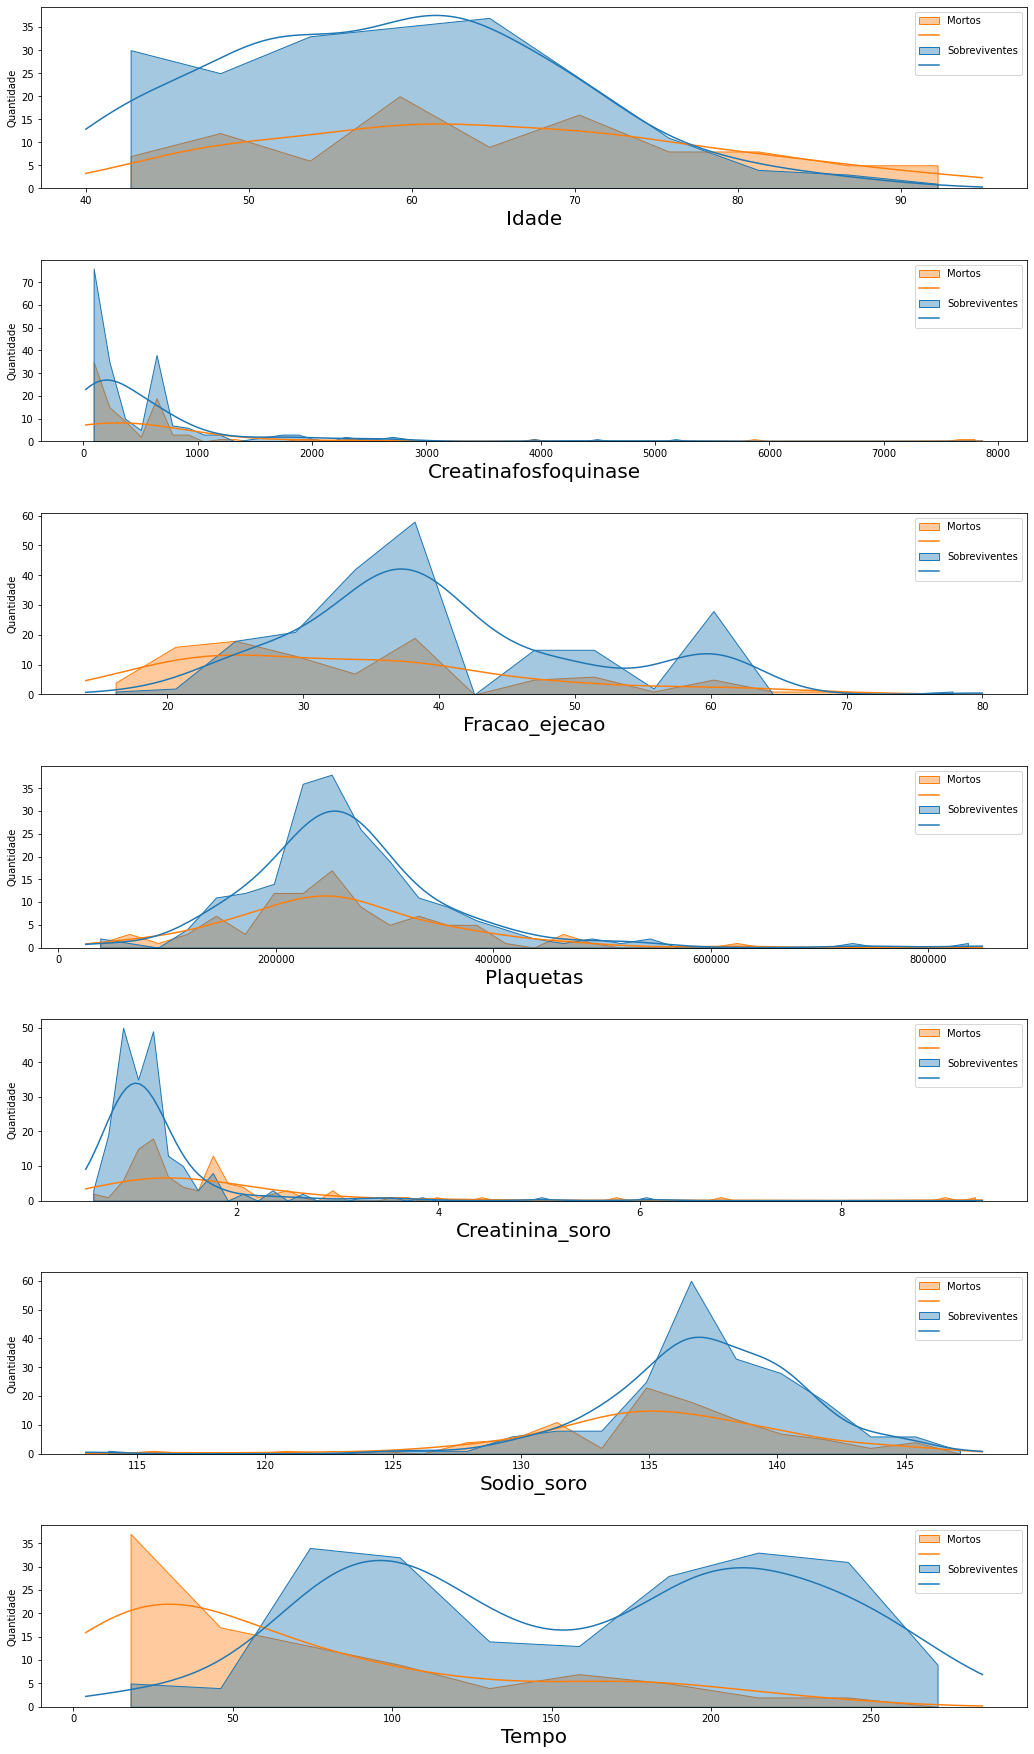

In [ ]:
fig, ax = plt.subplots(7, 1, figsize=(15, 25))

cont=0
for j in range(7):
    sns.histplot(data=df, x=vars_continuas[cont], ax=ax[j], kde=True, hue = 'Morte', alpha = 0.4, element = 'poly');
    ax[cont].legend(labels = ['Mortos', None, 'Sobreviventes', None])
    ax[cont].set_ylabel('Quantidade')
    ax[cont].set_xlabel(vars_continuas[cont], size="20")
    cont = cont + 1

fig.tight_layout(pad=3.0)

# kde=True: traça a linha da distribuição em densidade, mostrando, com maior precisão 
# e suavidade, a evolução da variável plotada.

Outra forma de visualizar a distribuição dos dados é pelo _distplot_, abaixo, que também é interativo e mais visual, embora mais "pesado". Analisando a variável Sodio_soro apenas a título de exemplo:

In [ ]:
fig = ff.create_distplot([df.Sodio_soro],['Sodio_soro'],bin_size=1)
iplot(fig, filename='Basic Distplot')

A análise dos histogramas acima permite algumas conclusões a respeito do _dataset_:

* Idade: o resultado morte é mais comum que o resultado não-morte para pessoas acima de 80 anos; além disso, há uma grande concentração de entradas referentes à população entre 50 e 70 anos.
* Fracao_ejecao: quando a capacidade de expulsar sangue do coração, medida em %, está inferior a aproximadamente 25%, a chance de morte é superior à de sobrevivência.
* Creatinina_soro: quanto menor o índice aferido, maior a chance de sobreviver que a de morrer. Não à toa, o valor de referência da variável é de 0,5 a 1,2 mg/dL.
* Tempo: quanto menor o tempo de acompanhamento, maior a chance do resultado morte.

### **5.2 Análise de risco de morte**

A matriz abaixo é um excelente recurso visual que  permite identificar a correlação entre todas as variáveis monitoradas na base de dados:

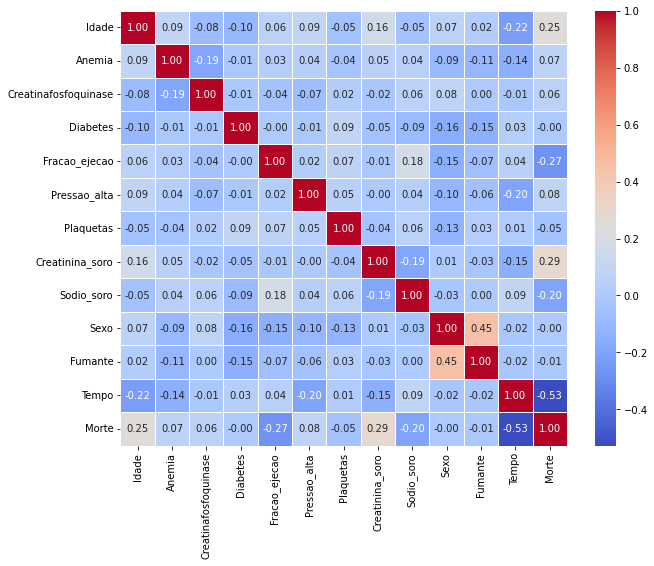

In [ ]:
# plot da matriz de correlação

correlation = df.corr()
plt.figure(figsize = (10,8))
plot = sns.heatmap(correlation, annot = True, fmt=".2f", linewidths=.6, cmap="coolwarm");

Confirmando as informações já obtidas, o gráfico de correlação aponta os seguintes fatores como os quatro que tem maior correlação com o evento "Morte":
1. Tempo = -0.53
2. Fracao_ejecao = -0.27
3. Creatinina_soro = 0.29
4. Idade = 0.25

**1. Tempo vs. Morte**

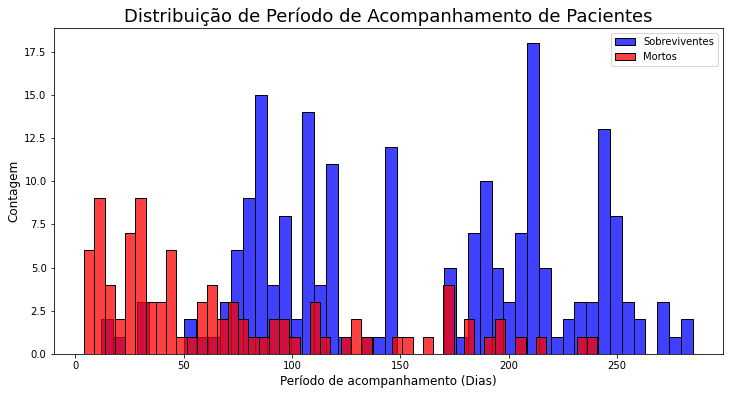

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Morte']==0]['Tempo'], kde=False, bins=50, color='b', label = 'Sobreviventes')
sns.histplot(df[df['Morte']==1]['Tempo'], kde=False, bins=50, color='r', label = 'Mortos')
plt.xlabel('Período de acompanhamento (Dias)', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.title('Distribuição de Período de Acompanhamento de Pacientes', fontsize=18)
plt.legend()
plt.show()

Vê-se que o risco é muito superior quando o período de acompanhamento do paciente é igual ou inferior a 115 dias:

In [ ]:
print(f"Risco de Morte com acompanhamento médico menor ou igual a 115 dias: {df[df['Tempo'] <= 115].Morte.mean() * 100:.2f}%")
print(f"Risco de Morte com acompanhamento médico maior que 115 dias: {df[df['Tempo'] > 115].Morte.mean() * 100:.2f}%")

Risco de Morte com acompanhamento médico menor ou igual a 115 dias: 50.33%
Risco de Morte com acompanhamento médico maior que 115 dias: 13.51%


**2. Fracao_ejecao vs. Morte**

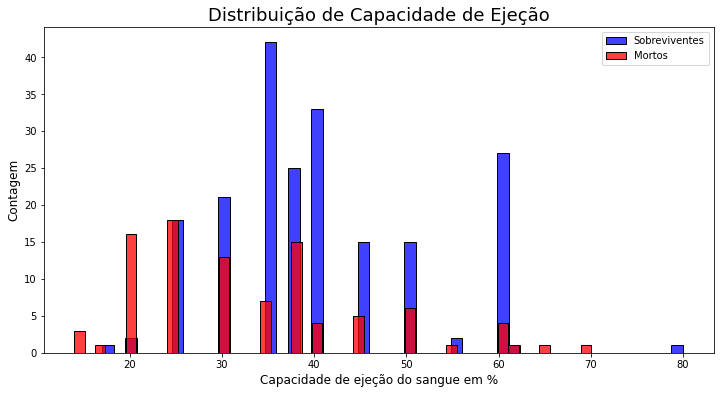

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Morte']==0]['Fracao_ejecao'], kde=False, bins=50, color='b', label = 'Sobreviventes')
sns.histplot(df[df['Morte']==1]['Fracao_ejecao'], kde=False, bins=50, color='r', label = 'Mortos')
plt.xlabel('Capacidade de ejeção do sangue em %', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.title('Distribuição de Capacidade de Ejeção', fontsize=18)
plt.legend()
plt.show()

**3. Creatinina_soro vs. Morte**

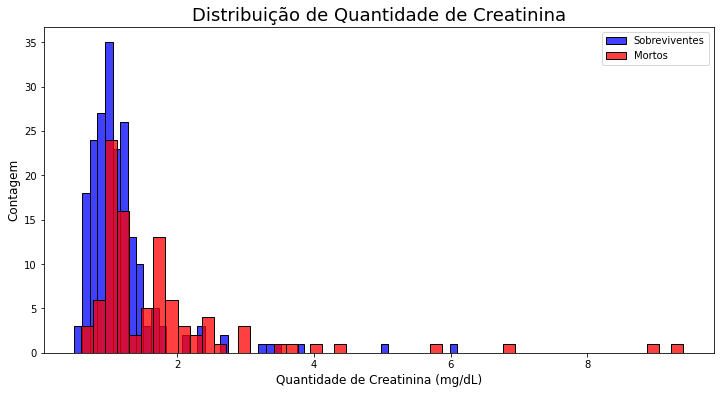

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Morte']==0]['Creatinina_soro'], kde=False, bins=50, color='b', label = 'Sobreviventes')
sns.histplot(df[df['Morte']==1]['Creatinina_soro'], kde=False, bins=50, color='r', label = 'Mortos')
plt.xlabel('Quantidade de Creatinina (mg/dL)', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.title('Distribuição de Quantidade de Creatinina', fontsize=18)
plt.legend()
plt.show()

**4. Idade vs. Morte**

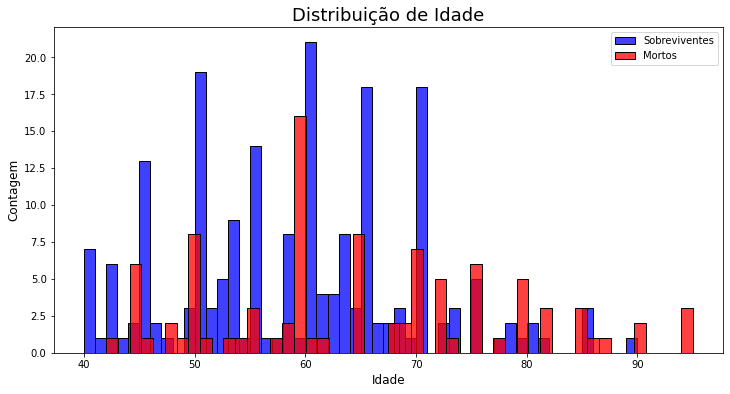

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Morte']==0]['Idade'], kde=False, bins=50, color='b', label = 'Sobreviventes')
sns.histplot(df[df['Morte']==1]['Idade'], kde=False, bins=50, color='r', label = 'Mortos')
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.title('Distribuição de Idade', fontsize=18)
plt.legend()
plt.show()

## 6. Insights e Conclusões

<img src = "/work/img/cardiac-arrest-gdaebf3b52_1920.jpg">

A partir dos dados obtidos e das análises realizadas, conseguimos extrair os seguintes insights e conclusões, já abordados acima:

* **Distribuição de Variáveis**: das 13 variáveis apresentadas, 7 são contínuas e 6 são categóricas, uma das quais é o alvo da análise, qual seja, a variável "Morte".

* **Tendência ao resultado "Morte"**: das 299 entradas, cerca de 68% dos casos resultam em morte, o que corresponde ao dobro do resultado não-morte. Isso desbalanceia o _dataset_ e pode enviesar um modelo baseado nele.

* **Correlação entre variáveis e resultado "Morte"**: das 13 variáveis, apenas Anemia e Diabetes, dentre as categóricas, tem proporção balanceada e não enviesam um possível modelo preditivo. Em relação ao resultado, somente 4 variáveis contínuas apresentam correlação igual ou superior a +- 0.25: Tempo, Idade, Fracao_ejecao e Creatinina_soro.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fc9333e2-da7c-4029-8b49-7e93b16fb8b3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>